# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

#import warnings so to ignore Python warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Shows number of rows and columns in data.
df.shape

(1898, 9)

#### Observations:


There are 1898 rows and 9 columns in this data set. 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


The dataset consists of 9 columns containing the following data types: integers, string objects, and floats.

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [5]:
# Converting "objects" to "category" reduces the data space required to store the dataframe

# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [6]:
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
# this can be completed using the .astype() function. 

df["restaurant_name"]=df.restaurant_name.astype("category")
df["cuisine_type"]=df.cuisine_type.astype("category")
df["day_of_the_week"]=df.day_of_the_week.astype("category")

# Now displaying the info for the data after converting the objects to category data types. This resulted in a reduction of storage needed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:


Changing the data type to category rather than object lowered the amount of storage by approximately 31 kb. 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# One can use the .describe() function to check basic statistical information of the dataset. 
# order_id and customer_id should not be considered in this data; it is categorical data.

df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


After using the .describe() function to determine a basic statistical overview of the data, one can observe the following about food preparation time: <br>
    -Minimum Time: 20 minutes<br>
    -Maximum Time: 35 minutes<br>
    -Average (mean) Time: Approximately 27.37 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# One can use the .value_counts functions to determine how many orders were not rated. 

ratings = pd.value_counts(df.rating)
ratings

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [9]:
ratings.sum()

1898

In [10]:
# I want to determine the percent of orders that are not rated by the customers.
non_rated = (736 / (ratings.sum())) * 100
non_rated

38.77766069546891

#### Observations:


The are 736 orders out of 1898 where no rating was given; meaning nearly 40% of all orders have no rating given whatsoever. How can the company gauge customer interest or satisfaction when only 60% of orders are being rated?

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Univariate Analysis of Cuisine Type, Cost of the Order, Day of the Week, Rating, Food Preparation Time, and Delivery Time.

In [11]:
df.corr()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


In [12]:
df.cov()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,300358.500000,-8.698972e+05,86.831165,-17.836584,26.406695
customer_id,-869897.183975,1.292727e+10,-1124.477642,-15974.761597,-5588.932456
cost_of_the_order,86.831165,-1.124478e+03,56.007444,1.439700,-1.114537
food_preparation_time,-17.836584,-1.597476e+04,1.439700,21.459878,0.255564
delivery_time,26.406695,-5.588932e+03,-1.114537,0.255564,24.727118


##### Univariate Analysis of Weekend versus Weekday number of orders.

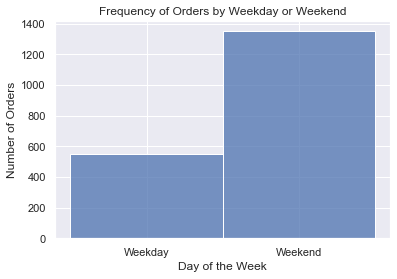

In [13]:
# A histogram of the Day of the Week that orders are placed can be useful to determine higher traffic in either the weekend or weekdays for the delivery service.

ax = sns.histplot(df.day_of_the_week);
plt.title('Frequency of Orders by Weekday or Weekend');
plt.xlabel('Day of the Week', fontsize=12);
plt.ylabel('Number of Orders', fontsize =12);

##### Univariate Analysis of Cuisine Type of Each Order

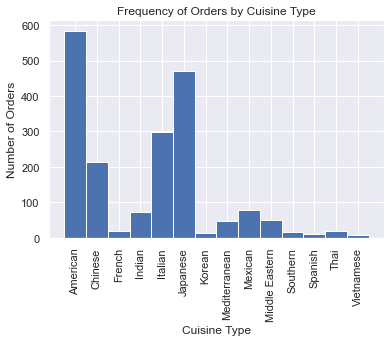

In [14]:
# Histplot of Cuisine Type

ax = sns.histplot(df.cuisine_type,alpha=1);
ax.tick_params(axis='x', rotation=90)
plt.title('Frequency of Orders by Cuisine Type');
plt.xlabel('Cuisine Type', fontsize=12);
plt.ylabel('Number of Orders', fontsize=12);


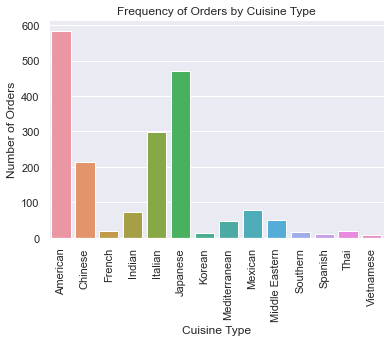

In [15]:
# Countplot of Cuisine Type provides a more colorful representation of same data. It can help better delineate each count.
ax=sns.countplot(df.cuisine_type,);
ax.tick_params(axis='x', rotation=90);
plt.title('Frequency of Orders by Cuisine Type');
plt.xlabel('Cuisine Type', fontsize=12);
plt.ylabel('Number of Orders', fontsize=12);

##### Univariate analysis of Cost of Each Order and their frequency.

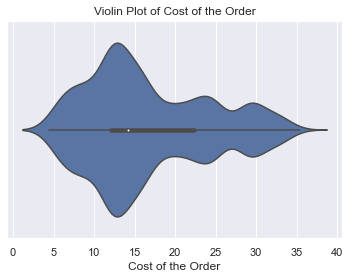

In [16]:
#Violin Plot allows us to effectively see the distribution of the cost of orders and the most often and least often ordered amounts.

ax=sns.violinplot(df.cost_of_the_order,);
plt.title('Violin Plot of Cost of the Order');
plt.xlabel('Cost of the Order');

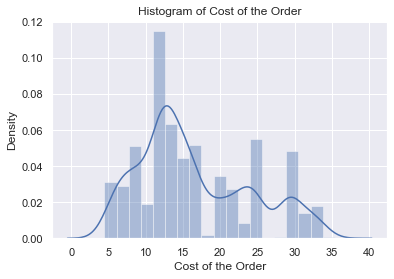

In [17]:
# Distribution Plots can be used to look at cost of orders as well. Distplot combines the histogram with a KDE line. Leaving the KDE line on gives us a look at the distribution in another way.

ax = sns.distplot(df.cost_of_the_order);
plt.title('Histogram of Cost of the Order');
plt.xlabel('Cost of the Order');

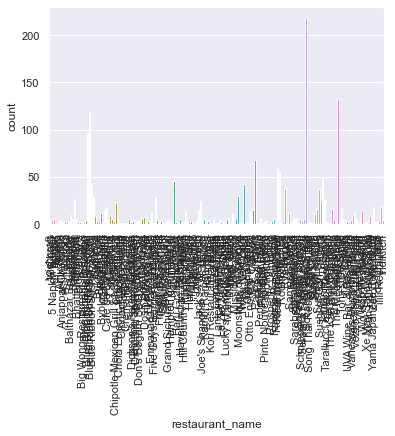

In [18]:
#Countplot can be used to determine the most popular restaurants based on number of orders. But this is messy! We can use some code to show only the most popular.

ax = sns.countplot(df.restaurant_name);
ax.tick_params(axis='x', rotation=90);

In [19]:
#First I created a new dataframe containing only the top restaurants and named it top_orders.
top_orders = df['restaurant_name'].value_counts().loc[lambda x : x>40].to_frame()
top_orders = top_orders.reset_index()
top_orders = top_orders.rename(columns = {'index':'restaurant_name','restaurant_name':'number_of_orders'})
top_orders

,restaurant_name,number_of_orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
5,RedFarm Broadway,59
6,RedFarm Hudson,55
7,TAO,49
8,Han Dynasty,46
9,Blue Ribbon Sushi Bar & Grill,44


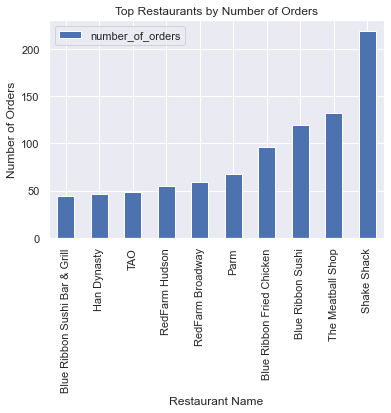

In [20]:
top_orders.groupby(by=['restaurant_name'])['number_of_orders'].sum().reset_index().sort_values(['number_of_orders']).tail(10).plot(x='restaurant_name',
                                                                                                           y='number_of_orders',
                                                                                                           kind='bar');
plt.title('Top Restaurants by Number of Orders');
plt.xlabel('Restaurant Name');
plt.ylabel('Number of Orders')
plt.show()

##### Univariate Analysis of Restaurant Rating

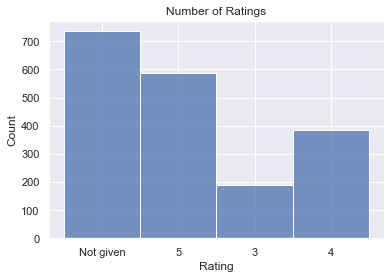

In [21]:
ax = sns.histplot(df.rating);
plt.title('Number of Ratings');
plt.xlabel('Rating');
plt.ylabel('Count');

A great number of orders (38.7%) were not given ratings at all. And none were given a rating of 1 or 2.

##### Univariate Analysis of Food Preparation Time

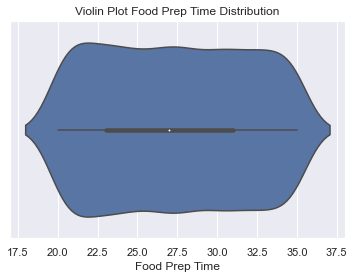

In [22]:
sns.violinplot(df.food_preparation_time);
plt.title('Violin Plot Food Prep Time Distribution');
plt.xlabel('Food Prep Time');

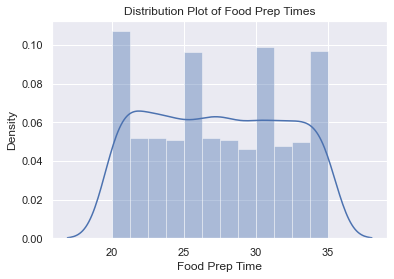

In [23]:
sns.distplot(df.food_preparation_time);
plt.title('Distribution Plot of Food Prep Times');
plt.xlabel('Food Prep Time');

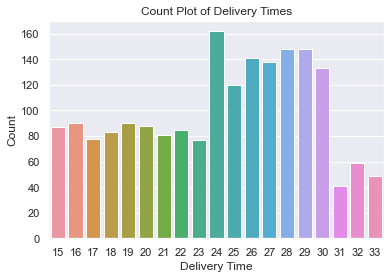

In [24]:
# Countplot has leaves us with a colorful representation of how long orders can take.
sns.countplot(df.delivery_time);
plt.title('Count Plot of Delivery Times');
plt.xlabel('Delivery Time');
plt.ylabel('Count');

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
pd.value_counts(df.restaurant_name)[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 restaurants for orders received.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
df.groupby(["cuisine_type", "day_of_the_week"]).size()

cuisine_type    day_of_the_week
American        Weekday            169
                Weekend            415
Chinese         Weekday             52
                Weekend            163
French          Weekday              5
                Weekend             13
Indian          Weekday             24
                Weekend             49
Italian         Weekday             91
                Weekend            207
Japanese        Weekday            135
                Weekend            335
Korean          Weekday              2
                Weekend             11
Mediterranean   Weekday             14
                Weekend             32
Mexican         Weekday             24
                Weekend             53
Middle Eastern  Weekday             17
                Weekend             32
Southern        Weekday              6
                Weekend             11
Spanish         Weekday              1
                Weekend             11
Thai            Weekday         

#### Observations:


The most popular cuisine on Weekends is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [27]:
#Using value_counts() and a lambda constraint, I found out how many orders of the 1898 were over $20 and then used basic arithmetic to calculate the percentage over $20
orders_over_twenty = df[df['cost_of_the_order']>20]

percentage = orders_over_twenty.shape[0]/df.shape[0]*100
print(percentage)

29.24130663856691


#### Observations:


Approximately 29.24% of the orders were over $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [28]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:


The mean order delivery time is approximately 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [29]:
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
65009      7
Name: customer_id, dtype: int64

#### Observations:


The top 5 customer IDs and their number of orders are:<br>
52832: 13 orders<br>
47440: 10 orders<br>
83287: 9 orders<br>
250494: 8 orders<br>
65009: 7 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


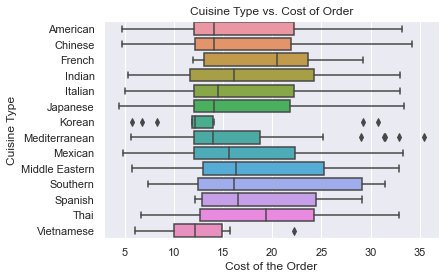

In [30]:
sns.boxplot(data=df, x='cost_of_the_order', y='cuisine_type');
plt.title('Cuisine Type vs. Cost of Order');
plt.xlabel('Cost of the Order');
plt.ylabel('Cuisine Type');

Few outliers exist meaning that most competitors based on the cuisine type have similar prices; the exception being Korean food which seems to have a wide swath of prices.

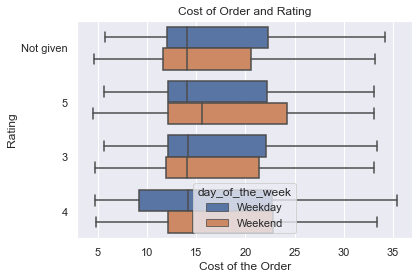

In [31]:
sns.boxplot(data=df, x ='cost_of_the_order', y = 'rating', hue = 'day_of_the_week');
plt.title('Cost of Order and Rating');
plt.xlabel('Cost of the Order');
plt.ylabel('Rating');

It's difficult to gain much insight here, but it does seem that higher ratings are given on the weekends; which is when food prep and delivery times are faster; despite more orders going out. I wish data was given on number of drivers working on the weekends versus the weekdays. 

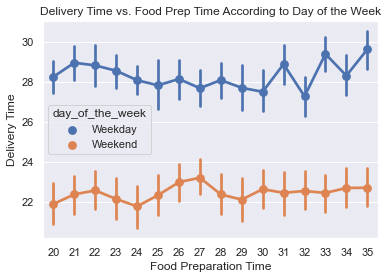

In [32]:
sns.pointplot(data=df, x='food_preparation_time', y='delivery_time', hue='day_of_the_week');
plt.title('Delivery Time vs. Food Prep Time According to Day of the Week');
plt.xlabel('Food Preparation Time');
plt.ylabel('Delivery Time');

Delivery times are quite a bit longer on the weekdays.

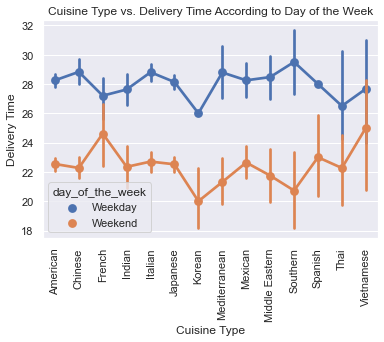

In [33]:
# Let's compare delivery times with cuisine types.

ax = sns.pointplot(data=df, x='cuisine_type', y='delivery_time', hue='day_of_the_week');
ax.tick_params(axis='x', rotation=90);
plt.title('Cuisine Type vs. Delivery Time According to Day of the Week');
plt.xlabel('Cuisine Type');
plt.ylabel('Delivery Time');

In [34]:
# I want to explore this same data, but with combined delivery and prep times into the total delivery time. 
# Make a copy of the dataframe. 

multi_total_del_time = df.copy()

In [35]:
# Then create a new column detailing total delivery time (order prep time and delivery time).

multi_total_del_time['total_delivery_time'] = (multi_total_del_time['food_preparation_time'] + multi_total_del_time['delivery_time'])
multi_total_del_time.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


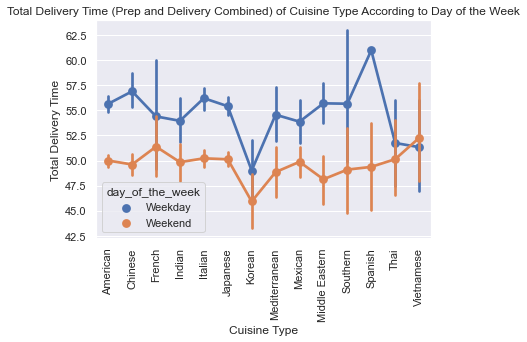

In [36]:
ax = sns.pointplot(data=multi_total_del_time, x='cuisine_type', y='total_delivery_time', hue='day_of_the_week');
ax.tick_params(axis='x', rotation=90);
plt.title('Total Delivery Time (Prep and Delivery Combined) of Cuisine Type According to Day of the Week');
plt.xlabel('Cuisine Type');
plt.ylabel('Total Delivery Time');

Vietnamese restaurants must have a longer prep time during the weekends as their total delivery time increased once the total delivery and prep times were combined.

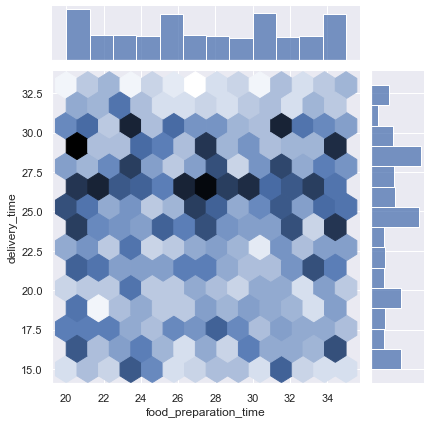

In [37]:
# Using a jointplot, we can compare two numerical data types with their histograms and a hex plot. 
# This can show us what delivery times occur most often.

sns.jointplot(data = df, x = 'food_preparation_time', y = 'delivery_time', kind = 'hex');

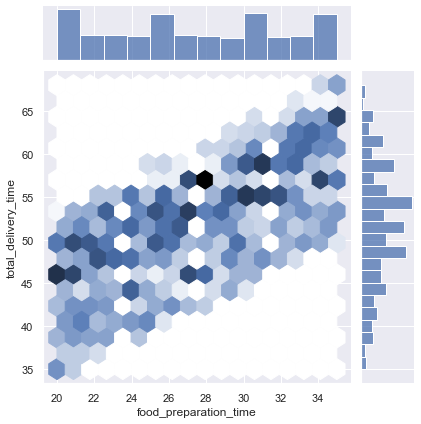

In [38]:
# Using the total delivery time (with both food prep and delivery combined) and comparing it to the prep time, 
# We can see how they are correlated. Which makes complete sense given how these variables are dependent upon each other. 

sns.jointplot(data = multi_total_del_time, x = 'food_preparation_time', y = 'total_delivery_time', kind = 'hex');

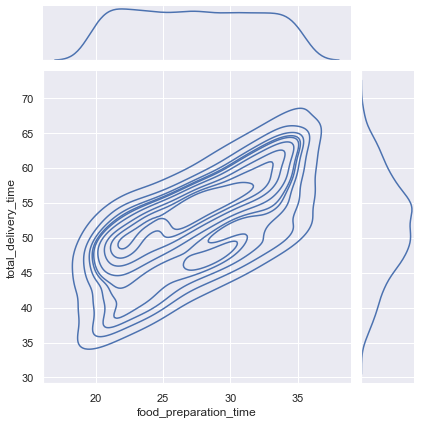

In [39]:
# I can view the same data using KDE.

sns.jointplot(data = multi_total_del_time, x= 'food_preparation_time', y = 'total_delivery_time', kind="kde");

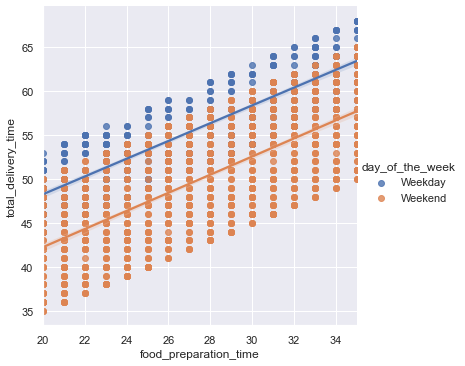

In [40]:
# Weekday deliveries take a considerably longer time.

sns.lmplot(y="total_delivery_time", x="food_preparation_time",hue="day_of_the_week", data=multi_total_del_time);

In [41]:
# I want to do some analysis with ratings, but they're presented as an object and not an integer. First make a copy of the data frame. 
rest3 = df.copy()

In [42]:
# We must remove all orders (rows) where no rating is given.
restng3 = rest3[rest3['rating'] != 'Not given']

In [43]:
# Make sure it worked and it did!

restng3.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [44]:
# Right now the "rating" category is set as data type "object"; we need to change it to numeric values in order to find the mean rating.

restng3['rating'] = pd.to_numeric(restng3['rating'])

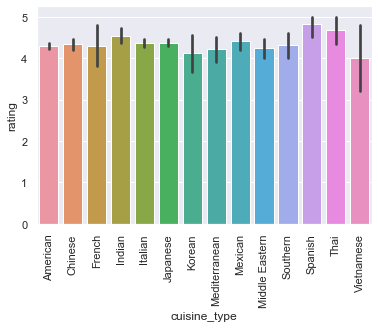

In [45]:
# Now that I've converted the rating to an integer, I can complete some further multi-variate analysis.
ax = sns.barplot(data=restng3, x = 'cuisine_type', y = 'rating');
ax.tick_params(axis='x', rotation=90);

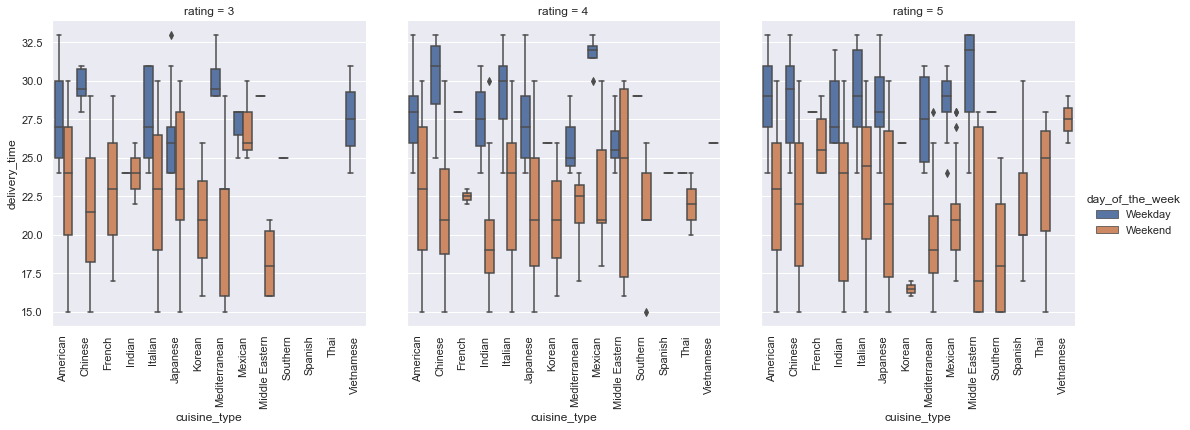

In [46]:
# A catplot can now be helpful in viewing the ratings in comparison to the cuisine types, delivery times, and day of the week.

ax = sns.catplot(x="cuisine_type",
               y = "delivery_time",
               hue="day_of_the_week", 
               col="rating", 
               data=restng3, 
               kind="box"); 
ax.set_xticklabels(rotation=90);

Some cuisine types have a very large variance in delivery times, but still manage to score with higher ratings. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [47]:
# Find how many actual ratings each restaurant has. The following restaurants have a rating count of more than 50.

restng3.value_counts(['restaurant_name'])

restaurant_name          
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
                            ... 
Market Table                   0
Paul & Jimmy's                 0
Room Service                   0
Rohm Thai                      0
Lamarca Pasta                  0
Length: 178, dtype: int64

In [48]:
# Now we can calculate the mean rating of each restaurant
# Reset the index so that we an sort the top 4 restaurants that we found earlier. 

restng3_mean = restng3.groupby('restaurant_name').mean()
restng3_mean.reset_index(inplace=True)
restng3_mean

,restaurant_name,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
0,'wichcraft,1478304.0,321492.000000,8.100000,5.000000,28.000000,28.0
1,12 Chairs,1477764.5,251052.000000,22.675000,4.500000,27.500000,29.0
2,5 Napkin Burger,1477921.0,263185.500000,27.135000,4.000000,26.500000,21.0
3,67 Burger,1478041.0,96456.000000,29.050000,5.000000,20.000000,28.0
4,Alidoro,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
173,Zero Otto Nove,1477801.0,268365.000000,12.180000,4.000000,29.000000,25.0
174,brgr,1477306.0,94691.000000,5.720000,3.000000,24.000000,26.0
175,da Umberto,1476867.0,91879.000000,12.270000,5.000000,20.000000,30.0
176,ilili Restaurant,1477414.0,141180.461538,21.573077,4.153846,26.692308,25.0


In [49]:
# Now we will remove all restaurants from our copied dataframe that have less than 50 ratings. 

restng3_mean = restng3_mean[(restng3_mean['restaurant_name'] == 'Shake Shack') | (restng3_mean['restaurant_name'] == 'The Meatball Shop') | (restng3_mean['restaurant_name'] == 'Blue Ribbon Sushi') | (restng3_mean['restaurant_name'] == 'Blue Ribbon Fried Chicken')]

In [50]:
# Now using the sort values function, we can view the top reviewed restaurants.
# These 4 restaurants have both an average rating over 4 and over 50 ratings. 

restng3_mean = restng3_mean.sort_values(['restaurant_name'])

# Clearing the following two means as the mean is not necessary and makes the table messy. 
restng3_mean.pop('customer_id')
restng3_mean.pop('order_id')

# Our solution
restng3_mean

,restaurant_name,cost_of_the_order,rating,food_preparation_time,delivery_time
20,Blue Ribbon Fried Chicken,17.665469,4.328125,26.984375,24.171875
21,Blue Ribbon Sushi,16.036438,4.219178,27.671233,23.260274
136,Shake Shack,16.730827,4.278195,28.090226,24.676692
153,The Meatball Shop,17.805357,4.511905,27.250000,24.904762


#### Observations:


This took a little additional coding, but the top restaurants that will earn the promotion are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [51]:
# First I will make a copy of the data frame to sort orders by cost. I will then concatenate them together to calculate total revenue.

over_20 = df.copy()
over_5 = df.copy()

In [52]:
# Locate all orders over $20 and create a new dataframe. 

over_20 = over_20.loc[over_20['cost_of_the_order'] >= 20]

# Create a new column to calculate order revenue (25%) and round to nearest hundredth since it is currency.

over_20['revenue'] = (over_20['cost_of_the_order'] * .25).round(2)
over_20.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.30
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,6.08
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,8.26


In [53]:
# Locate all orders over $5 and less than $20 and create a new dataframe. 

over_5 = over_5.loc[(over_5['cost_of_the_order'] >=5) & (over_5['cost_of_the_order']<20)]

# Create a new column to calculate order revenue (15%) and round to nearest hundredth since it is currency.

over_5['revenue'] = (over_5['cost_of_the_order'] * .15).round(2)

over_5.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,0.91
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.90


In [54]:
# Put the two new Dataframes together vertically. 

total_revenue = pd.concat([over_20, over_5], axis = 0)
total_revenue.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.30
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,6.08
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,8.26


In [55]:
# For the sake of continuity, reset the index. 

total_revenue.reset_index(drop=True)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69
1,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
2,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.30
3,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,6.08
4,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,8.26
...,...,...,...,...,...,...,...,...,...,...
1884,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,2.35
1885,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28,0.87
1886,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.83
1887,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.83


In [56]:
# Calculate the sum of the revenue column to determine total revenue for the company. 

Total_Rev = total_revenue['revenue'].sum()
Total_Rev

6166.4

#### Observations:


Total revenue for the company within this data is 6,166.40. Which, considering 1,899 orders is a mean of 3.25 per order.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [57]:
# First make a copy of the data. 

total_del_time = df.copy()

In [58]:
# Then create a new column detailing total delivery time (order prep time and delivery time).

total_del_time['total_delivery_time'] = (total_del_time['food_preparation_time'] + total_del_time['delivery_time'])
total_del_time.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [59]:
# For a simple solution, use .loc to locate the number of orders taking more than 60 minutes.

over_60 = total_del_time.loc[(total_del_time['total_delivery_time']>=60)]
over_60.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,61
37,1476871,118709,The Meatball Shop,Italian,24.30,Weekday,4,31,29,60


In [60]:
# Reset the index to gather correct count of orders over 60.

over_60.reset_index(drop=True)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63
1,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,62
2,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,61
3,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,61
4,1476871,118709,The Meatball Shop,Italian,24.30,Weekday,4,31,29,60
...,...,...,...,...,...,...,...,...,...,...
240,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,61
241,1478148,261371,Shake Shack,American,22.31,Weekend,Not given,35,28,63
242,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,65
243,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,62


In [61]:
# There are 245 orders out of 1898 which took longer than 60 minutes total to deliver.

(245 / 1898 * 100)

12.908324552160169

#### Observations:


Roughly 12.9% of all orders take longer than 60 minutes total to deliver.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [62]:
# First split the data into two different dataframes to find mean based on weekdays and weekends. 
weekdays = df.copy()
weekends = df.copy()

In [63]:
# Use the weekdays df and remove all weekend entries.

weekdays = weekdays[weekdays['day_of_the_week'] != 'Weekend']
weekdays.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26


In [64]:
weekday_mean = weekdays['delivery_time'].mean()
weekday_mean

28.340036563071298

In [65]:
# Use the weekends df and remove all weekday entries.

weekends = weekends[weekends['day_of_the_week'] != 'Weekday']
weekends.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22


In [66]:
weekend_mean = weekends['delivery_time'].mean()
weekend_mean

22.4700222057735

In [67]:
del_difference = weekday_mean - weekend_mean
del_difference

5.870014357297798

#### Observations:


Deliveries surprisingly take nearly 6 minutes longer on the weekdays than the weekends. This did not consider food preparation time as part of the delivery time summation. It would be interesting to know whether or not the company had more drivers working on the weekends as compared to the weekdays. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

My first recommendation is that more ratings need to be collected from the customers. Nearly 40% of all orders are received with no rating given. That's a large amount of ratings data that goes missing. The company should find ways to structure the app/website to collect ratings on as many orders as possible. Increased data would help the company make more informed decisions in the future.<br>
<br>
My second recommendation is to add number of delivery drivers working each day to the data set. There are a large number of orders going out on the weekends as compared to the weekdays, but ratings are generally higher on those weekend orders. I am assuming more drivers are working on the weekends and that has created a higher customer rating.<br>
<br>
Efforts need to be made to decrease the delivery times on weekdays. It could very well be that ratings would increase if these delivery times were decreased. Also, additional data could be gained as to why a higher or lower rating were given through a quick customer survey.<br>
<br>
Cuisine type did not seem to have a bearing on the ratings. Further data needs to be gained on ratings and number of drivers to gather more specific insights. However, FoodHub should focus on the most popular food types: American, Japanese, etc. to increase profits.


